# ITMAL Demo

MLP demo of solvers and a 1-neuron MLP for the OECD data from intro.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def LoadDataFromL01():
    import pickle
    filename = "../../L04/Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


###  Revisiting the problem with the MLP

Using the MLP for the QECD data in Qd) from `intro.ipynb` produced a negative $R^2$, meaning that it was unable to fit the data, and the MLP model was actually _worse_ than the naive $\hat y$ (mean value of y).

Let's just revisit this fact. When running the next cell you should now see an OK $~R^2_{lin.reg}~$ score and a negative $~R^2_{mlp}~$ score..

The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
MLP    .score(X, y)=0.16

OK


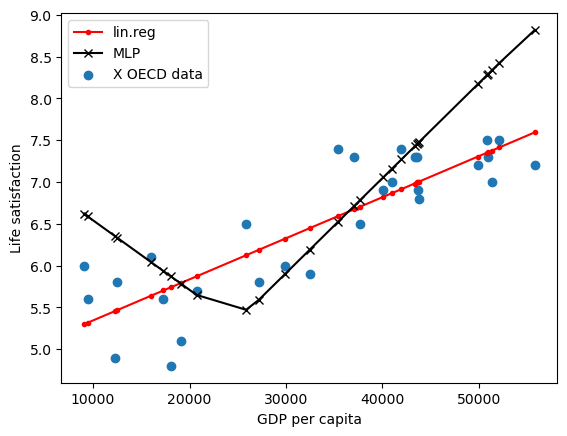

In [2]:
# Setup the MLP and lin. regression again..

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

def PlotModels(model1, model2, X, y, name_model1="lin.reg", name_model2="MLP"):

    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model1, model2, X, y):
        y_pred_model1 = model1.predict(X)
        y_pred_model2 = model2.predict(X)

        # call r2
        score_model1 = r2_score(y, y_pred_model1)
        score_model2 = r2_score(y, y_pred_model2)

        return y_pred_model1, y_pred_model2, score_model1, score_model2


    y_pred_model1, y_pred_model2, score_model1, score_model2 = CalcPredAndScore(
        model1, model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])
    
    l = max(len(name_model1), len(name_model2))
    
    print(f"{name_model1.ljust(l)}.score(X, y)={score_model1:0.2f}")
    print(f"{name_model2.ljust(l)}.score(X, y)={score_model2:0.2f}")


def MakePipeLine(modelname, model):
    return Pipeline([('scaler', StandardScaler()), (modelname, model)])
    

# lets make a linear and MLP regressor and redo the plots
mlp = MakePipeLine("mlp", MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='sgd',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
                  )
               
linreg = MakePipeLine('linreg', LinearRegression())

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y)

print("\nOK")

/opt/anaconda-2024.02/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda-2024.02/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp(solver=sgd  ,..)  => score=-0.43
mlp(solver=adam ,..)  => score=-44.62
mlp(solver=lbfgs,..)  => score= 0.75

lin.reg   .score(X, y)=0.73
MLP[lbfgs].score(X, y)=0.75

OK


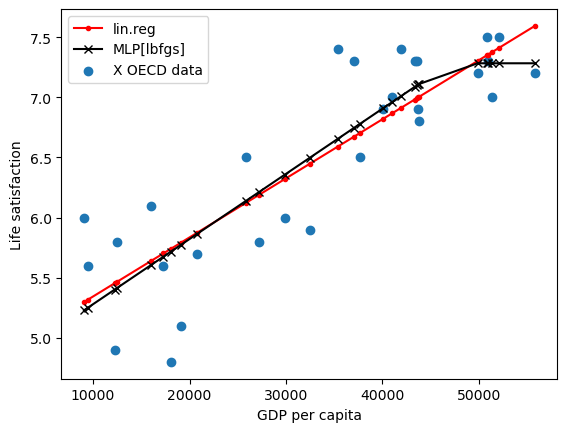

In [3]:
from sklearn.neural_network import MLPRegressor
solvers = ["sgd", "adam", "lbfgs"]

mlps = {}

for i in solvers:
    mlp = MakePipeLine('mlp'+i, MLPRegressor(solver=i, hidden_layer_sizes=(1,)))
    
    mlp.fit(X, y)
    score  = mlp.score(X, y)
    mlps[i] = mlp
    
    print(f"mlp(solver={i:5},..)  => score={'' if score<0 else ' '}{score:.2f}") 
    
print()
legend = ["lin.reg", "MLP[lbfgs]"]
PlotModels(linreg, mlps["lbfgs"], X, y, legend[0], legend[1])

if False:
    plt.plot(X, mlps["sgd"].predict(X) , "m.:")
    plt.plot(X, mlps["adam"].predict(X), "y.:")
    legend.append("MLP[sgd]")
    legend.append("MLP[adam]")
    plt.legend(legend)

print("\nOK")  